In [1]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

In [2]:
df = pd.read_csv('dreaddit-train.csv')
df

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.800000,1521614353,5,1.806818,...,1.0000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.000000,1527009817,4,9.429737,...,1.1250,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.800000,1535935605,2,7.769821,...,1.0000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.600000,1516429555,0,2.667798,...,1.0000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.800000,1539809005,24,7.554238,...,1.0000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",1713,0,1.000000,1515187044,13,-1.369333,...,1.4000,1.0000,1.0,1.71133,1.45301,2.00304,0.84,16,0.254444,0.552066
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1133,1,1.000000,1539827412,33,9.425478,...,1.0000,1.0000,1.0,1.65003,1.56842,1.81527,0.96,6,8.640664,-0.220370
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,10442,0,1.000000,1539269312,2,11.060675,...,1.1250,1.1250,1.0,1.79768,1.49074,1.92286,1.00,1,9.951524,0.045455
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,1834,0,0.571429,1488938143,4,2.421912,...,1.1111,1.1429,1.0,1.71642,1.57627,1.89972,0.75,7,4.036765,0.159722


In [3]:
listOfReviews = df['text'].tolist()
listOfReviews[0:1]

['He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI\'RE A HYPOCONDRIAC LIKE ME: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something I could even laugh at down the road. No, I ended up reading that this sense of doom can be indicative of various health ailments; one of which I am prone to.. So on top of my "doom" to my gloom..I am now f\'n worried about my heart. I do happen to have a physical in 48 hours.']

In [4]:
import seaborn as sns

sns.scatterplot(data=df['sentiment'])


In [5]:
df[df['sentiment'] > .9]

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
1731,homeless,90ll3a,"[0, 5]",Relying on an app (that depended on wifi) for ...,721,1,0.571429,1532135906,3,1.894505,...,1.375,1.1429,1.0,1.69863,1.45667,1.86426,0.67,21,3.883919,1.0


In [6]:
import nltk

In [7]:
print(df['sentiment'].max())
print(df['sentiment'].min())

1.0
-1.0


In [8]:
df['new sentiment'] = (df['sentiment']*5 + 5).round(1)

In [9]:
df['new sentiment']

0       5.0
1       6.5
2       5.1
3       5.7
4       4.0
       ... 
2833    7.8
2834    3.9
2835    5.2
2836    5.8
2837    5.1
Name: new sentiment, Length: 2838, dtype: float64

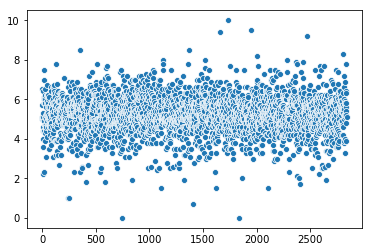

In [10]:
sns.scatterplot(data=df['new sentiment'])

In [11]:
#sns.set()
#sns.countplot(x='sentiment',data=df)

In [12]:
newdf = pd.DataFrame()

In [13]:
newdf['text'] = df['text']
newdf['sentiment'] = df['new sentiment']

In [14]:
newdf

,text,sentiment
0,"He said he had not felt that way before, sugge...",5.0
1,"Hey there r/assistance, Not sure if this is th...",6.5
2,My mom then hit me with the newspaper and it s...,5.1
3,"until i met my new boyfriend, he is amazing, h...",5.7
4,October is Domestic Violence Awareness Month a...,4.0
...,...,...
2833,"* Her, a week ago: Precious, how are you? (I i...",7.8
2834,I don't have the ability to cope with it anymo...,3.9
2835,In case this is the first time you're reading ...,5.2
2836,Do you find this normal? They have a good rela...,5.8


In [15]:
from keras.preprocessing.text import text_to_word_sequence